In [1]:
import pandas as pd
import numpy as np

In [2]:
col_names = ['symboling', 'normalized_losses', 
             'make', 'fuel_type', 'aspiration', 'num_doors', 'body_style',
             'drive_wheels', 'engine_location', 'wheel_base', 'length', 
             'width', 'height', 'curb_weight', 'engine_type', 
             'num_cylinders', 'engine_size', 'fuel_system', 'bore',
             'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 
             'city_mpg', 'highway_mpg', 'price']

In [3]:
cars = pd.read_csv('imports-85.data', names=col_names, header=None)

In [4]:
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-nul

Price is the target column
Features can be as follows:
* num_cylinder
* horsepower
* city_mpg or highway_mpg. Both these should be related.

In [6]:
cars.tail()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [7]:
cars = cars.replace('?', np.nan)

In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    164 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            203 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression_ratio    205 non-null float64
horsepower           203 non-nul

In [9]:
cars['bore'] = cars['bore'].astype(float)

In [10]:
cars['stroke'] = cars['stroke'].astype(float)

In [11]:
cars['horsepower'] = cars['horsepower'].astype(float)

In [12]:
cars['peak_rpm'] = cars['peak_rpm'].astype(float)

In [13]:
cars['price'] = cars['price'].astype(float)

In [14]:
cars['normalized_losses'].isnull().value_counts()

False    164
True      41
Name: normalized_losses, dtype: int64

In [15]:
cars[cars['price'].isnull()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,NaN,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,NaN,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,1,NaN,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


In [16]:
cars[cars['peak_rpm'].isnull()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
130,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295.0
131,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895.0


In [17]:
cars[cars['bore'].isnull()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0


In [18]:
cars[cars['num_doors'].isnull()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
27,1,148,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


* Column normalised-losses is removed. Not related to analysis
* Rows without following values are removed
    * price
    * horsepower / peak_rpm - HP is an related to price. So rows without this value is removed.
* Column bore and stroke. Not related to the analysis.
* Column num_doors - not related to analysis

In [19]:
columns_remove = ['normalized_losses', 'bore', 'stroke', 'num_doors']
cars = cars.drop(columns=columns_remove)

In [20]:
cars = cars.dropna(subset=['price', 'peak_rpm'])

In [21]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 22 columns):
symboling            199 non-null int64
make                 199 non-null object
fuel_type            199 non-null object
aspiration           199 non-null object
body_style           199 non-null object
drive_wheels         199 non-null object
engine_location      199 non-null object
wheel_base           199 non-null float64
length               199 non-null float64
width                199 non-null float64
height               199 non-null float64
curb_weight          199 non-null int64
engine_type          199 non-null object
num_cylinders        199 non-null object
engine_size          199 non-null int64
fuel_system          199 non-null object
compression_ratio    199 non-null float64
horsepower           199 non-null float64
peak_rpm             199 non-null float64
city_mpg             199 non-null int64
highway_mpg          199 non-null int64
price                199 non-nul

**Normalised**
All columns with numbers are normalised
(df - df.min())/(df.max() - df.min())

In [22]:
num_cols = ['symboling', 'wheel_base', 'length', 'width', 'height',
           'curb_weight', 'engine_size', 'compression_ratio', 'horsepower',
           'peak_rpm', 'city_mpg', 'highway_mpg']
normal_cars = cars.copy()
normal_cars[num_cols] = (cars[num_cols] - cars[num_cols].min()) / (cars[num_cols].max() - cars[num_cols].min())

In [23]:
normal_cars

,symboling,make,fuel_type,aspiration,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_type,num_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,1.0,alfa-romero,gas,std,convertible,rwd,front,0.058309,0.413433,0.324786,...,dohc,four,0.260377,mpfi,0.125000,0.294393,0.346939,0.222222,0.289474,13495.0
1,1.0,alfa-romero,gas,std,convertible,rwd,front,0.058309,0.413433,0.324786,...,dohc,four,0.260377,mpfi,0.125000,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.6,alfa-romero,gas,std,hatchback,rwd,front,0.230321,0.449254,0.444444,...,ohcv,six,0.343396,mpfi,0.125000,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.8,audi,gas,std,sedan,fwd,front,0.384840,0.529851,0.504274,...,ohc,four,0.181132,mpfi,0.187500,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.8,audi,gas,std,sedan,4wd,front,0.373178,0.529851,0.521368,...,ohc,five,0.283019,mpfi,0.062500,0.313084,0.551020,0.138889,0.157895,17450.0
5,0.8,audi,gas,std,sedan,fwd,front,0.384840,0.540299,0.512821,...,ohc,five,0.283019,mpfi,0.093750,0.289720,0.551020,0.166667,0.236842,15250.0
6,0.6,audi,gas,std,sedan,fwd,front,0.559767,0.770149,0.948718,...,ohc,five,0.283019,mpfi,0.093750,0.289720,0.551020,0.166667,0.236842,17710.0
7,0.6,audi,gas,std,wagon,fwd,front,0.559767,0.770149,0.948718,...,ohc,five,0.283019,mpfi,0.093750,0.289720,0.551020,0.166667,0.236842,18920.0
8,0.6,audi,gas,turbo,sedan,fwd,front,0.559767,0.770149,0.948718,...,ohc,five,0.264151,mpfi,0.081250,0.429907,0.551020,0.111111,0.105263,23875.0
10,0.8,bmw,gas,std,sedan,rwd,front,0.425656,0.532836,0.384615,...,ohc,four,0.177358,mpfi,0.112500,0.247664,0.673469,0.277778,0.342105,16430.0


**Start of training Function**

KNN used here

In [47]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
np.random.seed(0)

In [48]:
def knn_train_test(train_cols, target_col, df):
    df = df.loc[np.random.permutation(df.index), :]
    split_num = int(round(0.75 * len(df), 0))
    train_df = df.iloc[:split_num, :]
    test_df = df.iloc[split_num:, :]
    rmses = {}
    for col_name in train_cols:
        knn = KNeighborsRegressor()
        knn.fit(train_df[[col_name]], train_df[target_col])
        predictions = knn.predict(test_df[[col_name]])
        mse = mean_squared_error(predictions, test_df[target_col])
        rmse = np.sqrt(mse)
        rmses[col_name] = rmse
    
    return rmses

In [49]:
trn_cols = ['symboling', 'wheel_base', 'length', 'width', 'height',
           'curb_weight', 'engine_size', 'compression_ratio', 'horsepower',
           'peak_rpm', 'city_mpg', 'highway_mpg']
tgt_col = 'price'
cars_rmses = knn_train_test(trn_cols, tgt_col, normal_cars)

In [50]:
print('Training Parameter', ' '*3, 'RMSE')
for key in sorted(cars_rmses, key=cars_rmses.get):
    print('{:20}   {}'.format(key, cars_rmses[key]))

Training Parameter     RMSE
curb_weight            2782.0442824656834
city_mpg               2854.490847769528
engine_size            2862.003338921882
highway_mpg            3104.8203343832956
length                 3155.8479685815037
width                  3264.9184059636164
horsepower             3928.6783186206526
wheel_base             5900.450806980768
symboling              6139.5444849923515
compression_ratio      6416.126481795694
height                 6545.8071372138675
peak_rpm               6937.128635220772


* curb_weight, city_mpg, engine_size gives the lowest RMSE among the different training columns

In [69]:
def knn_train_test_neighbor(train_cols, target_col, df, n):
    np.random.seed(0)
    df = df.loc[np.random.permutation(df.index), :]
    split_num = int(round(0.75 * len(df), 0))
    train_df = df.iloc[:split_num, :]
    test_df = df.iloc[split_num:, :]
    rmses = {}
    for col_name in train_cols:
        knn = KNeighborsRegressor(n_neighbors=n)
        knn.fit(train_df[[col_name]], train_df[target_col])
        predictions = knn.predict(test_df[[col_name]])
        mse = mean_squared_error(predictions, test_df[target_col])
        rmse = np.sqrt(mse)
        rmses[col_name] = rmse
    
    return rmses

In [52]:
from matplotlib import pyplot as plt
%matplotlib inline

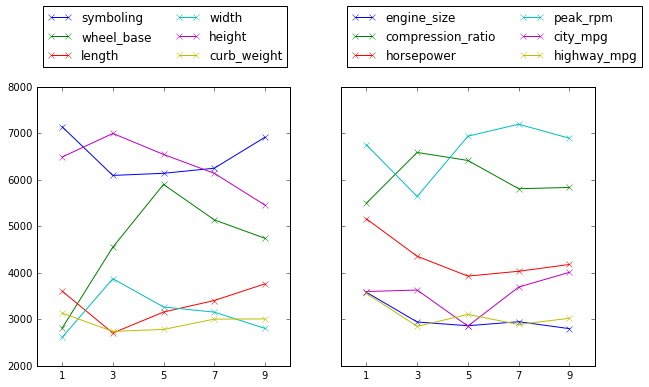

In [73]:
trn_cols = ['symboling', 'wheel_base', 'length', 'width', 'height',
           'curb_weight', 'engine_size', 'compression_ratio', 'horsepower',
           'peak_rpm', 'city_mpg', 'highway_mpg']
tgt_col = 'price'
neighbors = [1, 3, 5, 7, 9]
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10, 5))
rmses_list = []
for n in neighbors:
    rmses = knn_train_test_neighbor(trn_cols, tgt_col, normal_cars, n)
    rmses_list.append(rmses)

for col in trn_cols[:6]:
    rmse_col = []
    for rmses in rmses_list:
        rmse_col.append(rmses[col])
    ax1.plot(neighbors, rmse_col, '-x', label=col)

for col in trn_cols[6:]:
    rmse_col = []
    for rmses in rmses_list:
        rmse_col.append(rmses[col])
    ax2.plot(neighbors, rmse_col, '-x', label=col)
    
ax1.legend(loc='lower left', bbox_to_anchor=(0, 1.05), ncol=2)
ax2.legend(loc='lower left', bbox_to_anchor=(0, 1.05), ncol=2)
ax1.set_xticks(neighbors)
ax2.set_xticks(neighbors)
ax1.set_xlim([0, 10])
ax2.set_xlim([0, 10])
plt.show()

* horsepower with 3 neighbors gave the lowest RMSE.
* engine_size has low rmse across all neighbors.
* Other low RMSE parameters are wheel_base, curb_weight, highway_mpg

In [74]:
def knn_train_test_cols(train_cols, target_col, df):
    np.random.seed(0)
    df = df.loc[np.random.permutation(df.index), :]
    split_num = int(round(0.75 * len(df), 0))
    train_df = df.iloc[:split_num, :]
    test_df = df.iloc[split_num:, :]

    knn = KNeighborsRegressor()
    knn.fit(train_df[train_cols], train_df[target_col])
    predictions = knn.predict(test_df[train_cols])
    mse = mean_squared_error(predictions, test_df[target_col])
    rmse = np.sqrt(mse)
        
    return rmse

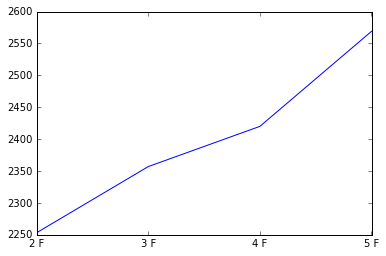

In [76]:
two_features = ['engine_size', 'horsepower']
three_features = ['engine_size', 'horsepower', 'wheel_base']
four_features = ['engine_size', 'horsepower', 'wheel_base', 'curb_weight']
five_features = ['engine_size', 'horsepower', 'wheel_base', 'curb_weight',
                'highway_mpg']

trn_cols = [two_features, three_features, four_features, five_features]
tgt_col = 'price'

rmses = []
for cols in trn_cols:
    rmses.append(knn_train_test_cols(cols, tgt_col, normal_cars))
    
fig, ax = plt.subplots()
ax.plot(rmses)
plt.xticks(np.arange(4), ['2 F', '3 F', '4 F', '5 F'])
plt.show()

* Two features - engine_size and horsepower gives the lowest rmse

In [79]:
def knn_train_test_cols_neighbors(train_cols, target_col, df, n):
    np.random.seed(0)
    df = df.loc[np.random.permutation(df.index), :]
    split_num = int(round(0.75 * len(df), 0))
    train_df = df.iloc[:split_num, :]
    test_df = df.iloc[split_num:, :]

    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(train_df[train_cols], train_df[target_col])
    predictions = knn.predict(test_df[train_cols])
    mse = mean_squared_error(predictions, test_df[target_col])
    rmse = np.sqrt(mse)
        
    return rmse

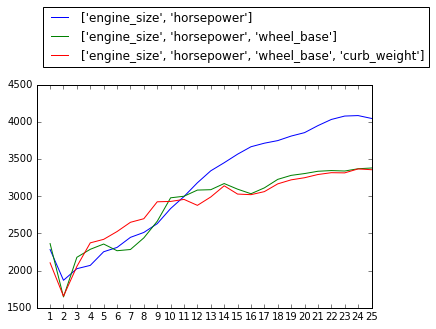

In [86]:
two_features = ['engine_size', 'horsepower']
three_features = ['engine_size', 'horsepower', 'wheel_base']
four_features = ['engine_size', 'horsepower', 'wheel_base', 'curb_weight']

trn_cols = [two_features, three_features, four_features]
tgt_col = 'price'
neighbors = [x for x in range(1, 26)]

fig, ax = plt.subplots()
for cols in trn_cols:
    rmses = []
    for n in neighbors:
        rmses.append(knn_train_test_cols_neighbors(cols, tgt_col, normal_cars, n))
    
    ax.plot(neighbors, rmses, label=cols)
    
plt.xticks(np.arange(1, 26), neighbors)
plt.legend(loc='lower left', bbox_to_anchor=(0, 1.05))
plt.show()

* Lowest RMSE is obtained with `k=2` and three or four features of `['engine_size', 'horsepower', 'wheel_base', 'curb_weight']`
* Higher value of `k` gives larger value of RMSE
* For default `k=5`, lowest RMSE is with two features as seen in the previous graph. But for `k=2`, a better RMSE value is obtained with four features or three features

## K Cross fold validation

In [87]:
from sklearn.model_selection import cross_val_score, KFold

In [89]:
model = KNeighborsRegressor()
kf = KFold(4, shuffle=True, random_state=1)

mses = cross_val_score(model, normal_cars[['horsepower']], normal_cars['price'],
                      scoring='neg_mean_squared_error', cv=kf)

In [90]:
mses

array([ -5873972.0936    , -24281885.1264    ,  -9442416.2048    ,
       -24404889.20653062])

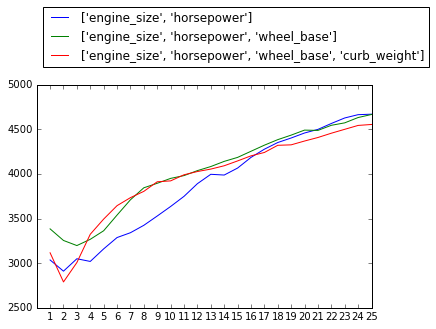

In [95]:
two_features = ['engine_size', 'horsepower']
three_features = ['engine_size', 'horsepower', 'wheel_base']
four_features = ['engine_size', 'horsepower', 'wheel_base', 'curb_weight']

trn_cols = [two_features, three_features, four_features]

neighbors = [x for x in range(1, 26)]

fig, ax = plt.subplots()
for cols in trn_cols:
    rmses = []
    for n in neighbors:
        model = KNeighborsRegressor(n_neighbors=n)
        mses = cross_val_score(model, normal_cars[cols], normal_cars['price'],
                      scoring='neg_mean_squared_error', cv=kf)
        rmses.append(np.mean(np.sqrt(np.absolute(mses))))
    ax.plot(neighbors, rmses, label=cols)
        
plt.xticks(np.arange(1, 26), neighbors)
plt.legend(loc='lower left', bbox_to_anchor=(0, 1.05))
plt.show()

* `k=2` and four features gives the loweset RMSE score. This RMSE score is higher than previously obtained score. But since this is k-fold validation, this score is more aceptable that previous RMSE.
* At other neigbors number, two features give better RMSE score than three or four features. But lowest RMSE is still with `k=2` and four features.

# Slide 6
That's it for the guided steps. Here are some ideas for next steps:

Modify the knn_train_test() function to use k-fold cross validation instead of test/train validation.
Modify the knn_train_test() function to perform the data cleaning as well.
Curious to see what other students have done on this project? (https://community.dataquest.io/tags/c/social/share/49/155) Head over to our Community to check them out. While you are there, please remember to show some love and give your own feedback!

And of course, we welcome you to share your own project and show off your hard work. Head over to our Community to share your finished Guided Project!